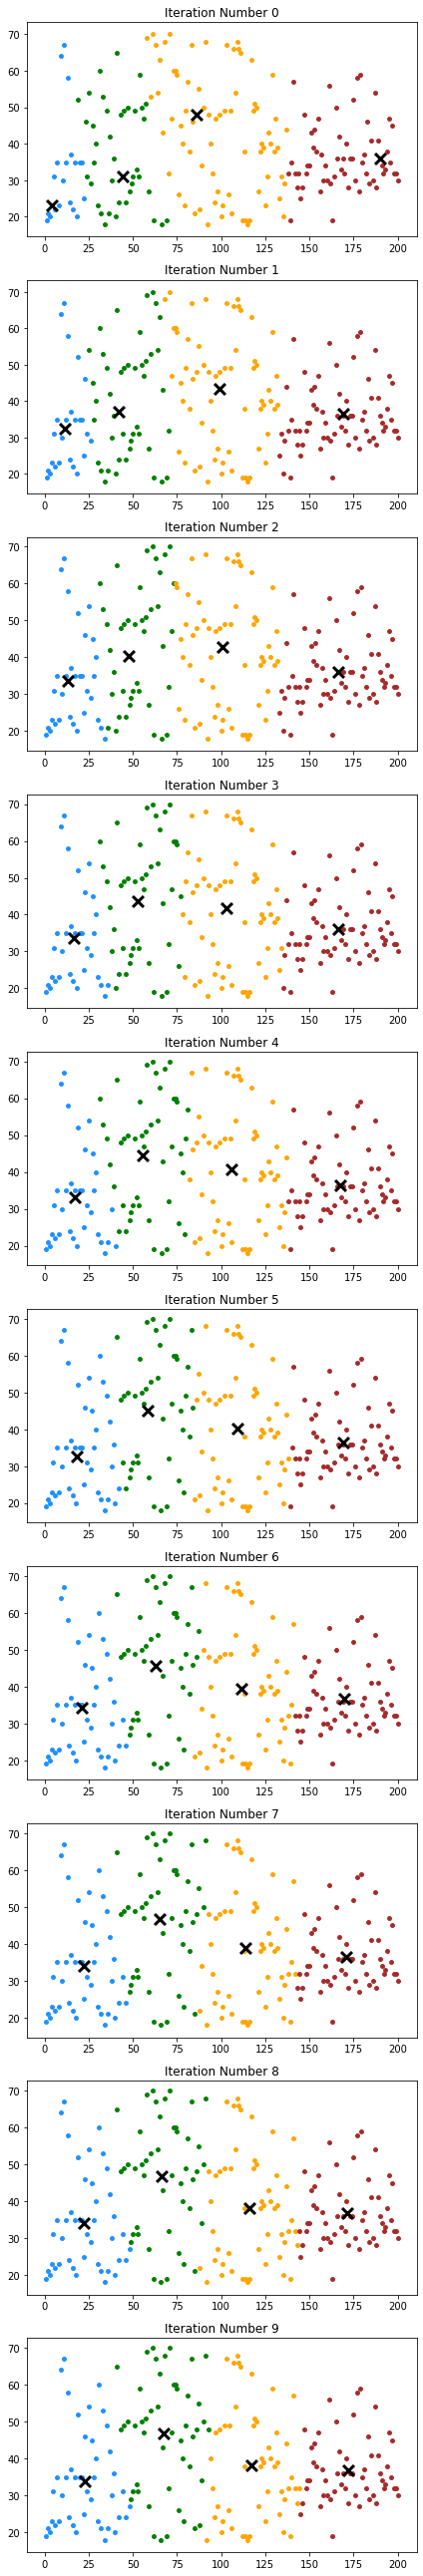

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
df=pd.read_csv('dataset.csv',header=None)
X = df.iloc[:, [0,1]].values
K = 4

def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:] - centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx

def computeCentroids(X, idx, K):
    m, n = X.shape[0],X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    for i in range(m):
        index = int((idx[i]-1))
        centroids[index,:]+=X[i,:]
        count[index]+=1    
    return centroids/count

def plotKmeans(X, centroids, idx, K, num_iters):
    m,n = X.shape[0],X.shape[1]
    fig, ax = plt.subplots(nrows=num_iters,ncols=1,figsize=(6,36))
    for i in range(num_iters):    
        color = ['green','orange','brown','dodgerblue','red']
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)
        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        centroids = computeCentroids(X, idx, K)
        idx = findClosestCentroids(X, centroids)
    plt.tight_layout()
#randomintialization
def InitCentroids(X, K):
    Initial_centroids = np.zeros((K,X.shape[1]))
    for i in range(K):
        Initial_centroids[i] = X[np.random.randint(0,X.shape[0]+1),:]
    return Initial_centroids

Initial_centroids = InitCentroids(X, K)
idx = findClosestCentroids(X,Initial_centroids)
plotKmeans(X,Initial_centroids,idx, K,10)